<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Malayalam/ULMFiT_Malayalam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train=pd.read_csv('/content/Mal_sentiment_full_train.tsv', sep="\t")
train

,text,category
0,Sunny chechi fans evide like adichu power kani...,unknown_state
1,Angane july month ile ende aadyathe leave njan...,Positive
2,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...,unknown_state
3,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........,Positive
4,Trailer powli oru raksha illa . Pakshea padam ...,Positive
...,...,...
15883,Minimum 10 thavana kandavar maathram like adi,unknown_state
15884,Please cinema kaannaaan kothi aakunnu onnu rel...,Positive
15885,USA ok.. India No... Sadhacharam,unknown_state
15886,nama hero december 12 wait & see mamamaga mah...,Positive


In [7]:
val=pd.read_csv('/content/Mal_sentiment_full_test_withlabels.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val

,id,text,category
0,Mal_1,Teaserinu kurach samayamkoodi mathram. Cant wa...,Positive
1,Mal_2,അപ്പോൾ കഥയുടെ റൂട്ട് മാറിയല്ലോ...,unknown_state
2,Mal_3,മൂത്തോൻ ട്രൈലെർ Trending List വരാത്തത് എന്താ ?,unknown_state
3,Mal_4,Nowadays 944k views is considered as 1M views ...,not-malayalam
4,Mal_5,Maass.trailer ennu paranja ithaanU makkale.......,Positive
...,...,...,...
1957,Mal_1958,Expression വച്ചു നോക്കുമ്പോൾ മൂക്കുത്തി കട്ടത്...,unknown_state
1958,Mal_1959,എനിക്ക് ഒരു 100 like തരുമോ,unknown_state
1959,Mal_1960,Nannayi onnu poliyunna lakshnm unde...Thrill m...,Negative
1960,Mal_1961,Athikam eduthu kayatti vekkenda....direction k...,Mixed_feelings


In [8]:
df=train.filter(['category','text'], axis=1)
df_test=val.filter(['category','text'],axis=1)

In [9]:
#removing @ and #
def punc(df):
    df['text'] = df['text'].str.replace('[#@()]','')
    print(df)

In [10]:
punc(df)
punc(df_test)

             category                                               text
0       unknown_state  Sunny chechi fans evide like adichu power kani...
1            Positive  Angane july month ile ende aadyathe leave njan...
2       unknown_state  ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...
3            Positive  ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........
4            Positive  Trailer powli oru raksha illa . Pakshea padam ...
...               ...                                                ...
15883   unknown_state      Minimum 10 thavana kandavar maathram like adi
15884        Positive  Please cinema kaannaaan kothi aakunnu onnu rel...
15885   unknown_state                   USA ok.. India No... Sadhacharam
15886        Positive  nama hero december 12 wait & see  mamamaga mah...
15887  Mixed_feelings  Madhuraraja 1 hour 40 k likes  Lucifer 1 min 4...

[15888 rows x 2 columns]
            category                                               text
0           Positive  Teas

In [11]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [12]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [13]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (15888 items)
x: LMTextList
xxbos xxmaj sunny chechi fans evide like adichu power xxunk 🤣 🤣,xxbos xxmaj angane july month ile ende xxunk leave njan angu edukuva xxmaj july 5 nu,xxbos ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്നവർ ലൈക്‌ ബട്ടൺ അടിച്ചു xxunk xxrep 11 -,xxbos ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു xxrep 7 . മുൻ കാല collection recordukal xxunk,xxbos xxmaj trailer powli oru raksha illa . xxmaj xxunk padam xxunk xxunk over degrade venda padam xxunk paraya
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1962 items)
x: LMTextList
xxbos xxmaj teaserinu kurach xxunk mathram . xxmaj ca nt wait ..,xxbos അപ്പോൾ കഥയുടെ xxunk xxunk ...,xxbos മൂത്തോൻ ട്രൈലെർ xxmaj trending xxmaj list xxunk എന്താ ?,xxbos xxmaj xxunk xxunk views is xxunk as 1 m views in kerala,xxbos xxmaj xxunk ennu paranja ithaanu makkale xxrep 5 . katta waiting for xxmaj lucifer
y: LMLabelList
,,,,
Path: .;

Test: None>

In [14]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.16E-02
Min loss divided by 10: 7.94E-02


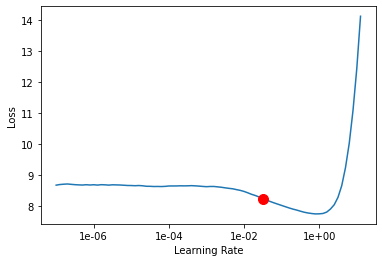

In [15]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)

In [16]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,6.303837,4.955502,0.295663,00:09
1,5.236258,4.706089,0.312915,00:09


In [17]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.548404,4.685227,0.304974,00:12
1,4.178710,4.439253,0.336256,00:12
2,3.450384,4.568889,0.331346,00:12


In [18]:
learn.freeze_to(-1)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-03
Min loss divided by 10: 3.98E-03


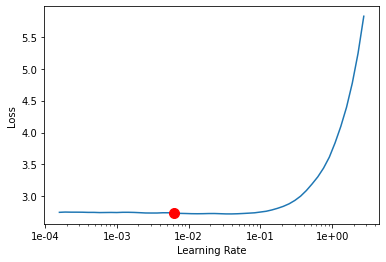

In [19]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [20]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.827034,4.609274,0.333131,00:09
1,2.666039,4.655221,0.332270,00:09
2,2.421175,4.665324,0.334184,00:10


In [21]:
learn.freeze_to(-2)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.25E-03
Min loss divided by 10: 1.58E-03


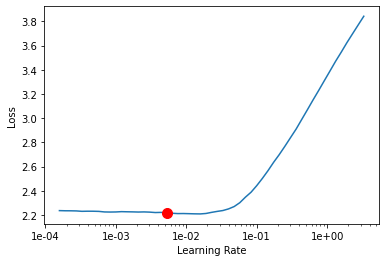

In [22]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [23]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.295878,4.818237,0.324936,00:10
1,2.195921,4.877341,0.323150,00:10
2,2.012702,4.913754,0.324554,00:10


In [24]:
#save the encoder model
learn.save_encoder('my_encoder')

In [25]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [26]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (15888 items)
x: TextList
xxbos xxmaj sunny chechi fans evide like adichu power xxunk 🤣 🤣,xxbos xxmaj angane july month ile ende xxunk leave njan angu edukuva xxmaj july 5 nu,xxbos ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്നവർ ലൈക്‌ ബട്ടൺ അടിച്ചു xxunk xxrep 11 -,xxbos ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു xxrep 7 . മുൻ കാല collection recordukal xxunk,xxbos xxmaj trailer powli oru raksha illa . xxmaj xxunk padam xxunk xxunk over degrade venda padam xxunk paraya
y: CategoryList
unknown_state,Positive,unknown_state,Positive,Positive
Path: .;

Valid: LabelList (1962 items)
x: TextList
xxbos xxmaj teaserinu kurach xxunk mathram . xxmaj ca nt wait ..,xxbos അപ്പോൾ കഥയുടെ xxunk xxunk ...,xxbos മൂത്തോൻ ട്രൈലെർ xxmaj trending xxmaj list xxunk എന്താ ?,xxbos xxmaj xxunk xxunk views is xxunk as 1 m views in kerala,xxbos xxmaj xxunk ennu paranja ithaanu makkale xxrep 5 . katta waiting for xxmaj lucifer
y: CategoryList
Positive,unknown_state,

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.25E-03
Min loss divided by 10: 3.63E-02


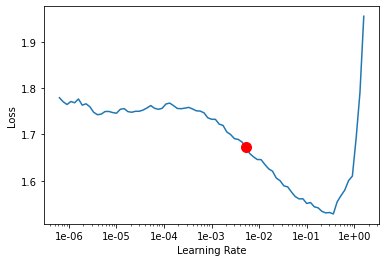

In [27]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [28]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.090915,1.037156,0.578491,0.450036,00:09
1,1.039211,0.981434,0.594801,0.492183,00:09
2,0.970090,0.967567,0.609072,0.519565,00:09


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

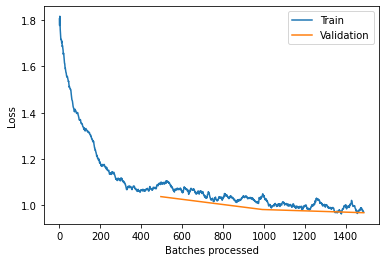

In [29]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 4.79E-03


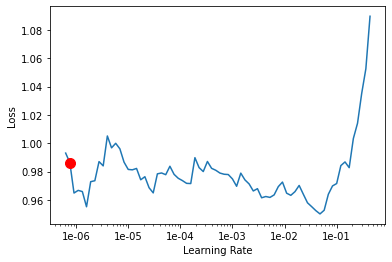

In [30]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [31]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.995280,0.935184,0.623853,0.502008,00:10
1,0.881145,0.901712,0.641182,0.565762,00:11


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-06
Min loss divided by 10: 9.12E-04


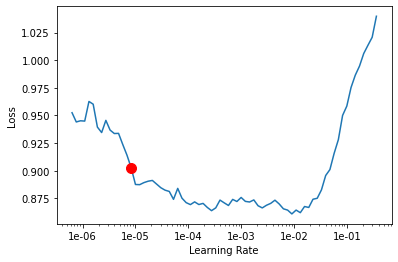

In [32]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [33]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.905810,0.878240,0.659531,0.576699,00:16
1,0.754318,0.839055,0.669725,0.606162,00:16


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [34]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.723202,0.845305,0.679409,0.595689,00:21
1,0.583824,0.847822,0.691641,0.627637,00:22


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.608721,0.872600,0.681957,0.616591,00:23
1,0.416471,0.893954,0.691641,0.635892,00:23


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.355511,0.956003,0.699796,0.645200,00:23
1,0.339914,0.971551,0.693170,0.641773,00:23
2,0.278197,0.997704,0.693680,0.643108,00:23


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [35]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [36]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4
row_0,,,,,
0,46,10,9,3,13
1,25,141,28,0,49
2,37,55,616,20,115
3,3,2,22,116,24
4,23,50,105,8,442


In [37]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[ 46  10   9   3  13]
 [ 25 141  28   0  49]
 [ 37  55 616  20 115]
 [  3   2  22 116  24]
 [ 23  50 105   8 442]]
0.6936799184505607


In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.3433    0.5679    0.4279        81
           1     0.5465    0.5802    0.5629       243
           2     0.7897    0.7307    0.7591       843
           3     0.7891    0.6946    0.7389       167
           4     0.6874    0.7038    0.6955       628

    accuracy                         0.6937      1962
   macro avg     0.6312    0.6555    0.6368      1962
weighted avg     0.7084    0.6937    0.6990      1962

